# EDA on Titanic Dataset

## Load the libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


## Load the dataset

In [2]:
df = pd.read_csv('Data/Titanic_Machine_Learning_from_Disaster.csv')

## Initial Exploration

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Observation

- Total entries (df shape) : 891 * 12

- Columns dtypes: float64(2), int64(5), object(5)

             Column       Non-Null Count  Dtype  
        ---  ------       --------------  -----  
         0   PassengerId  891 non-null    int64  
         1   Survived     891 non-null    int64  
         2   Pclass       891 non-null    int64  
         3   Name         891 non-null    object 
         4   Sex          891 non-null    object 
         5   Age          714 non-null    float64
         6   SibSp        891 non-null    int64  
         7   Parch        891 non-null    int64  
         8   Ticket       891 non-null    object 
         9   Fare         891 non-null    float64
         10  Cabin        204 non-null    object 
         11  Embarked     889 non-null    object 

- Null counts:

        Age            177
        Cabin          687
        Embarked         2


## Handle Missing Data

* For continuous column - replace null with median

* For categorical column - replace null with mode

In [3]:
df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Basic EDA

In [31]:
for col in df.columns:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts(dropna=False))
    print("-" * 40)
    

Value counts for 'PassengerId':
PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64
----------------------------------------
Value counts for 'Survived':
Survived
0    549
1    342
Name: count, dtype: int64
----------------------------------------
Value counts for 'Pclass':
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
----------------------------------------
Value counts for 'Name':
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                 

### Separate categorical and continuous columns

In [4]:
cat_cols = df.select_dtypes(include=["object", "category"]).columns
cat_cols


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [5]:
con_cols = df.select_dtypes(include=["int64", "float64"]).columns
con_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

## Univariate Analysis

### a. Categorical Columns

In [34]:
for col in df[cat_cols]:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts(dropna=False))
    print("-" * 40)

Value counts for 'Name':
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
----------------------------------------
Value counts for 'Sex':
Sex
male      577
female    314
Name: count, dtype: int64
----------------------------------------
Value counts for 'Ticket':
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
----------------------------------

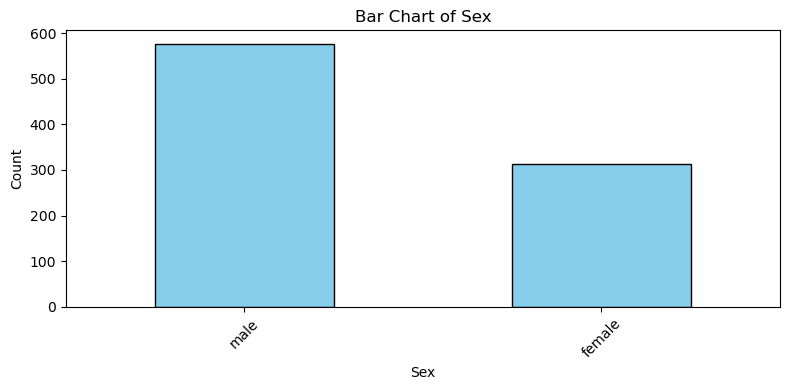

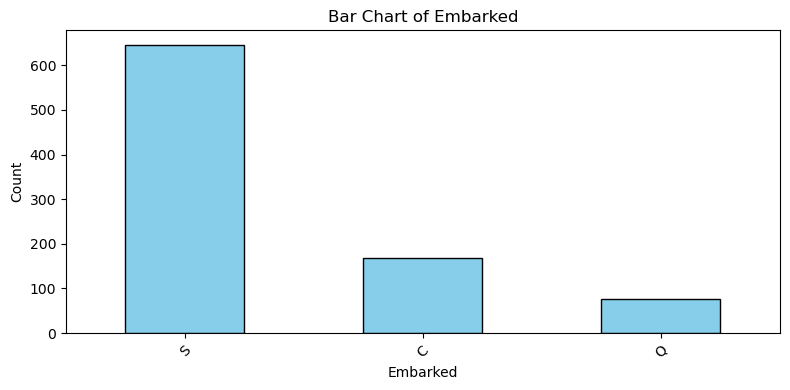

In [50]:
# Plot bar charts for categorical columns
for col in ['Sex', 'Embarked']:
    plt.figure(figsize=(8, 4))
    df[col].value_counts(dropna=False).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [54]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

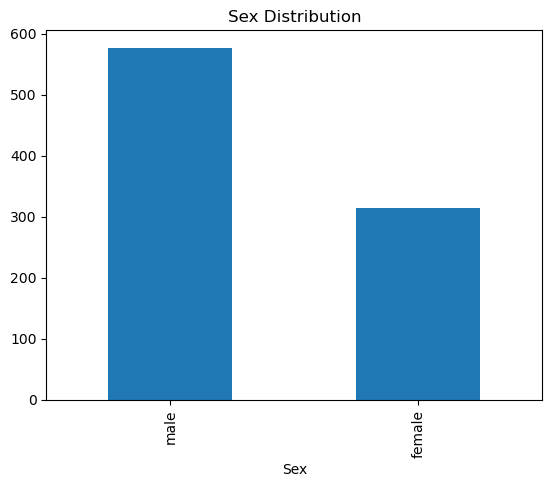

In [57]:
df['Sex'].value_counts().plot(kind='bar', title='Sex Distribution')
plt.show()


In [56]:
# Passenger class: 1 = First, 2 = Second, 3 = Third
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

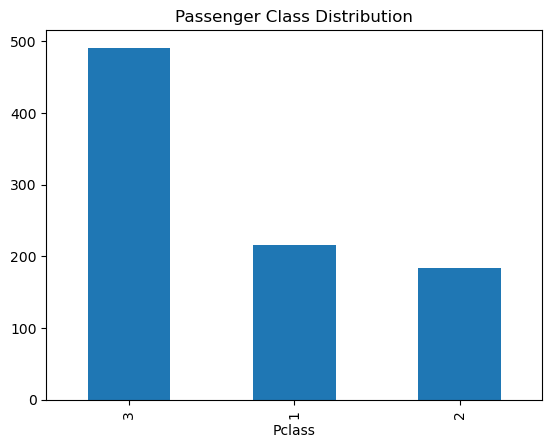

In [58]:
df['Pclass'].value_counts().plot(kind='bar', title='Passenger Class Distribution')
plt.show()


In [59]:
# Port of embarkation (where the passenger boarded):
# C = Cherbourg, Q = Queenstown, S = Southampton

df['Embarked'].value_counts()


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

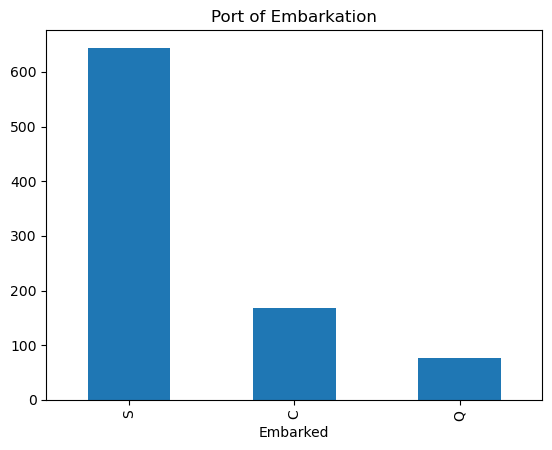

In [17]:

df['Embarked'].value_counts().plot(kind='bar', title='Port of Embarkation')
plt.show()


In [60]:
# Survival status: 0 = No, 1 = Yes

df['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

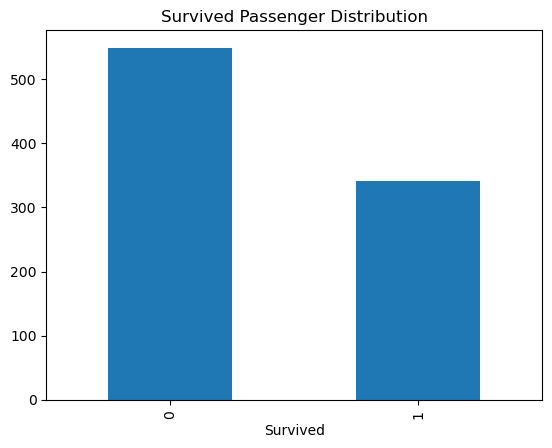

In [51]:

df['Survived'].value_counts().plot(kind='bar', title='Survived Passenger Distribution')
plt.show()


In [61]:
# Number of siblings or spouses aboard the Titanic with the passenger.

df['SibSp'].value_counts()


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

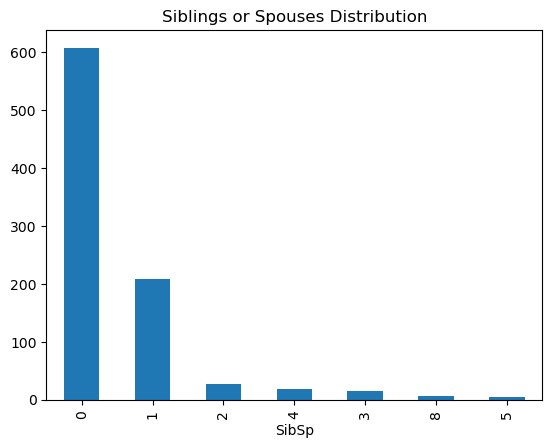

In [62]:

df['SibSp'].value_counts().plot(kind='bar', title='Siblings or Spouses Distribution')
plt.show()


In [64]:
# Number of parents or children aboard the Titanic with the passenger.

df['Parch'].value_counts()


Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

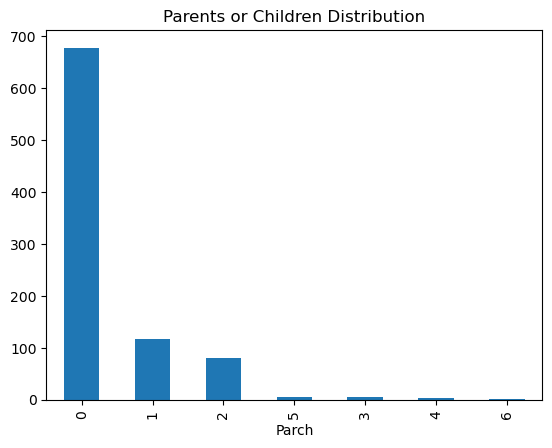

In [65]:

df['Parch'].value_counts().plot(kind='bar', title='Parents or Children Distribution')
plt.show()


### b. Numerical Columns

In [66]:
for col in df[cat_cols]:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts(dropna=False))
    print("-" * 40)

Value counts for 'Name':
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
----------------------------------------
Value counts for 'Sex':
Sex
male      577
female    314
Name: count, dtype: int64
----------------------------------------
Value counts for 'Ticket':
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
----------------------------------

In [71]:
df[con_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


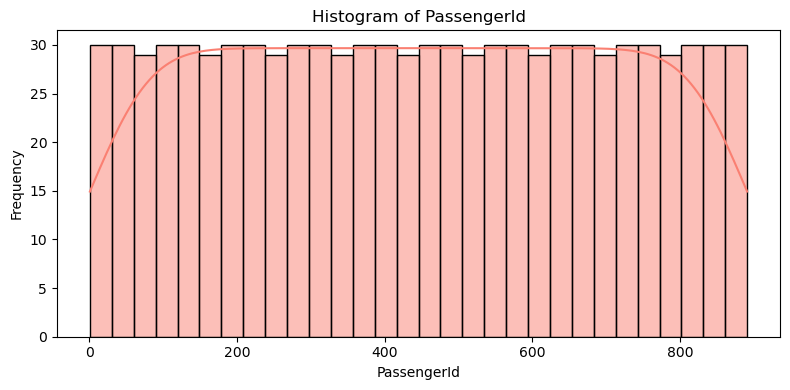

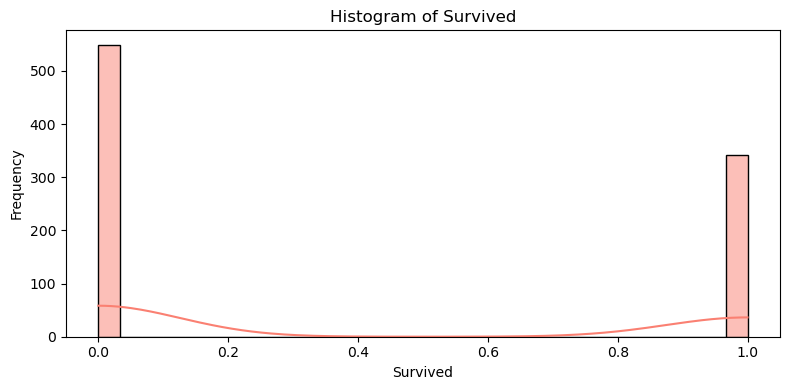

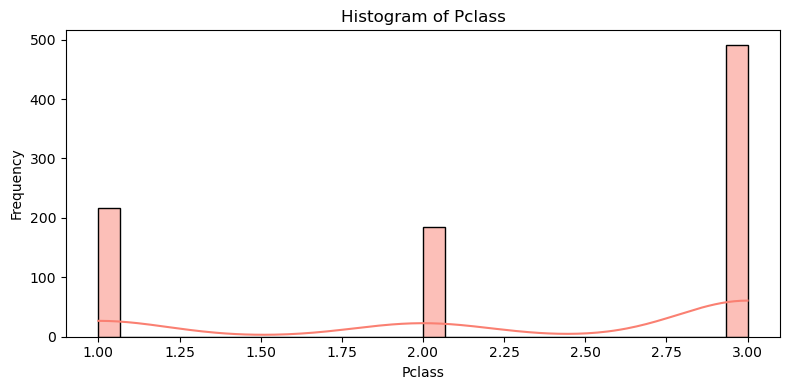

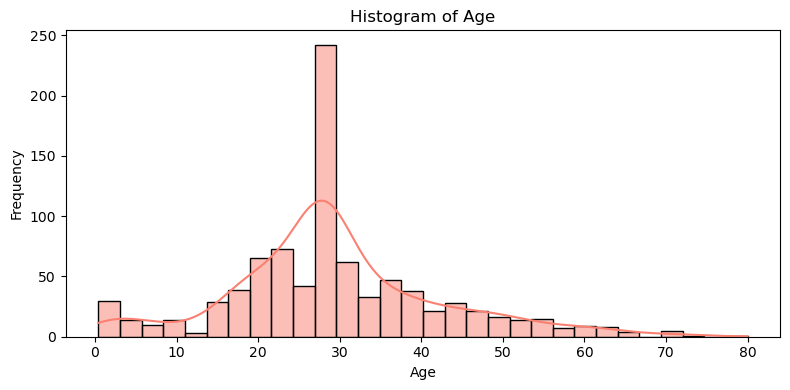

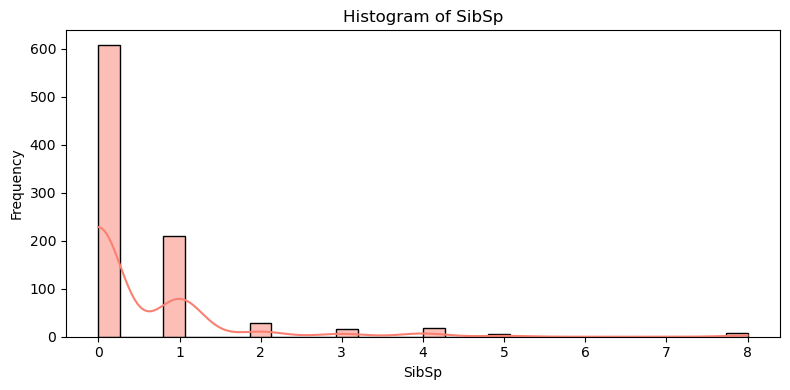

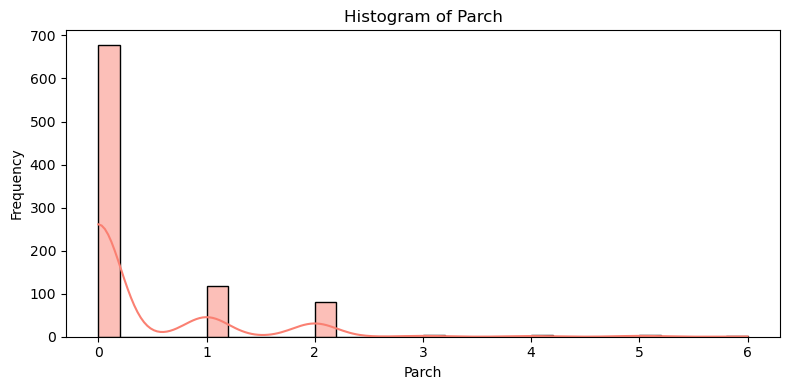

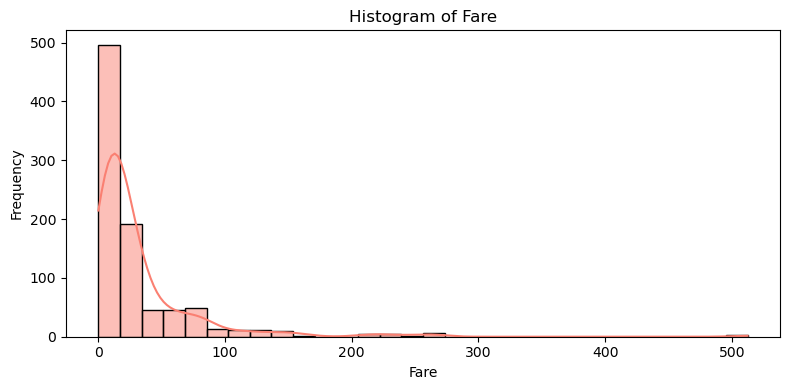

In [72]:
# Plot histograms for continuous columns
for col in con_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='salmon', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

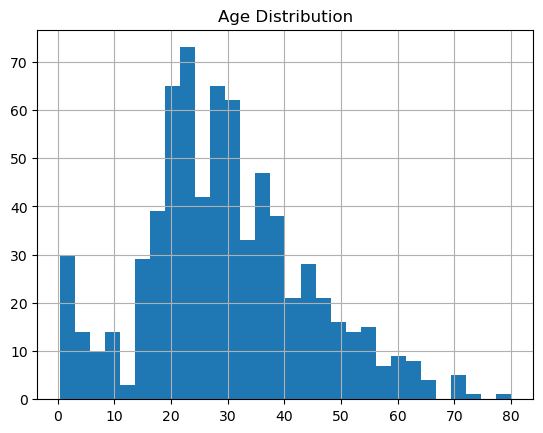

In [18]:
df['Age'].hist(bins=30)
plt.title("Age Distribution")
plt.show()


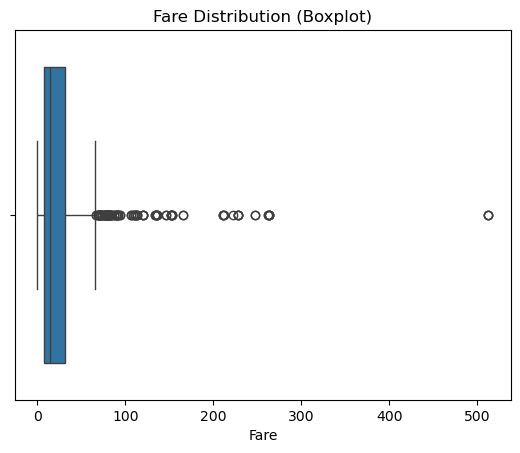

In [20]:
sns.boxplot(x='Fare', data=df)
plt.title("Fare Distribution (Boxplot)")
plt.show()


### Observations

1. Survived - About 62% of passengers did not survive, while around 38% survived.

2. Pclass (Passenger Class) - Most passengers belonged to 3rd class, followed by 1st and 2nd.

3. Sex - There were more males than females on board.

4. Age - Most passengers were in the 15–40 years age range.

5. SibSp (Siblings/Spouses Aboard) - Most passengers had no siblings/spouses aboard.

6. Parch (Parents/Children Aboard) - Similar to SibSp, most had no parents/children aboard.

7. Fare - Majority of fares were low-priced, most likely for 3rd class passengers. A few outliers paid significantly higher fares, likely 1st class.

8. Embarked - Most passengers embarked from Southampton (S), followed by Cherbourg (C) and Queenstown (Q).

9. Cabin - A large portion of the data is missing in the Cabin column.

10. Ticket - Very diverse and unstructured.

## Bivariate Analysis

### a. Survival Rate by Sex

In [75]:
df.groupby(['Sex', 'Survived']).size().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


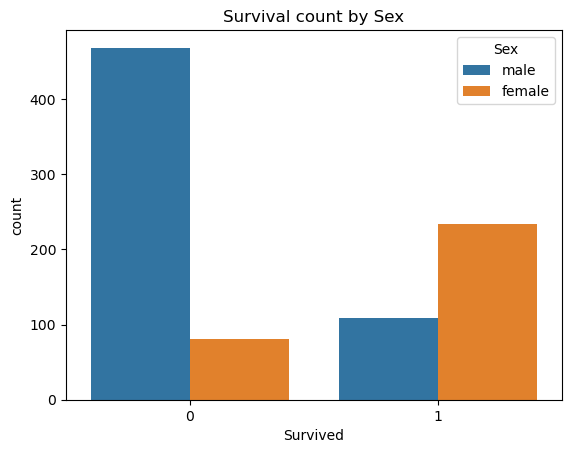

In [78]:
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title("Survival count by Sex")
plt.show()


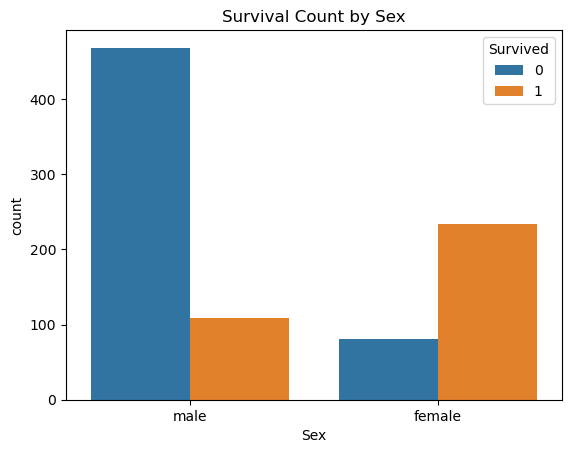

In [77]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
plt.show()


#### Observation

* Females had a much higher survival rate than males.

* Most male passengers did not survive, indicating a possible “women and children first” evacuation policy.

### b. Survival Rate by Class

In [76]:
df.groupby(['Pclass', 'Survived']).size().unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


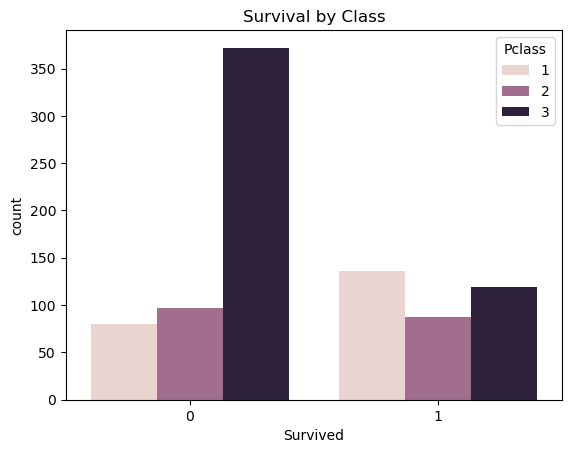

In [22]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Class")
plt.show()


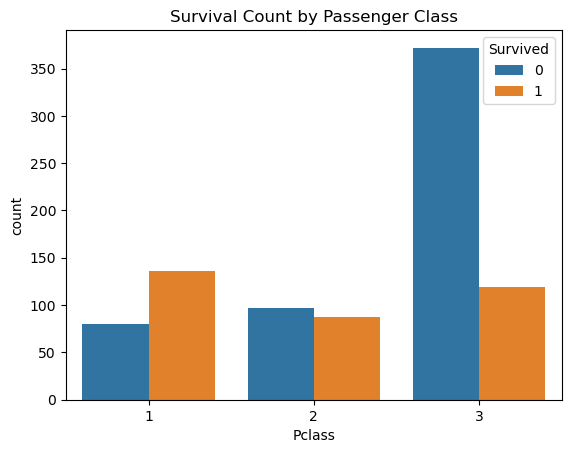

In [79]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.show()


#### Observation:

* Passengers in 1st class had the highest survival rate.

* Those in 3rd class were least likely to survive, showing a clear socioeconomic divide in survival.

### Survival vs Embarked

In [80]:
pd.crosstab(df['Embarked'], df['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


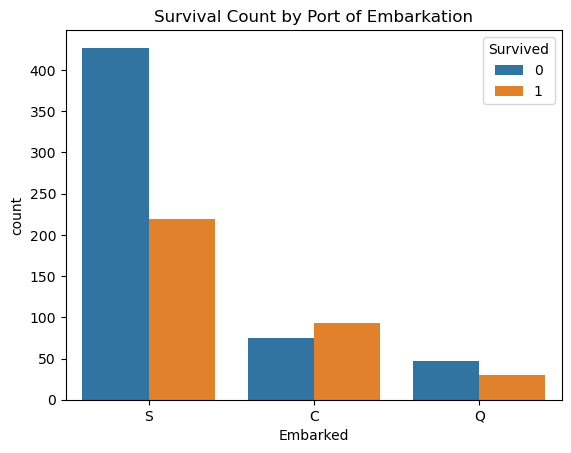

In [81]:
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival Count by Port of Embarkation')
plt.show()


#### Observations:

* Passengers who embarked from port ‘C’ (Cherbourg) had a higher survival rate.

* Those from ‘S’ (Southampton) had the lowest.

### Survival vs Fare

In [83]:
df.groupby('Survived')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


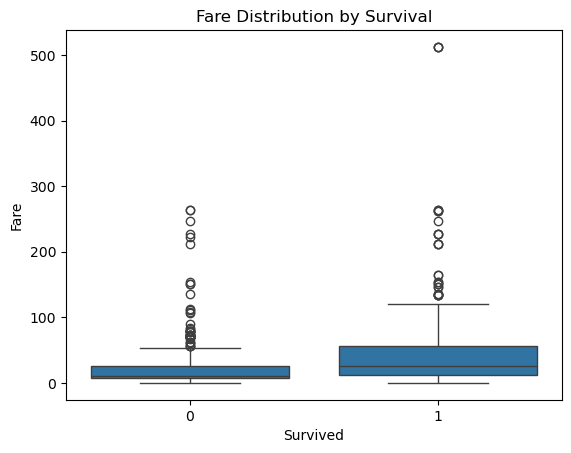

In [82]:
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival')
plt.show()


#### Observations:

* Survivors generally paid higher fares, likely indicating 1st class travel.

* Fare distribution is skewed, with some very high-paying passengers mostly surviving.

### Survival vs Age

In [84]:
df.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,30.028233,12.499986,1.00,23.0,28.0,35.0,74.0
1,342.0,28.291433,13.764425,0.42,21.0,28.0,35.0,80.0


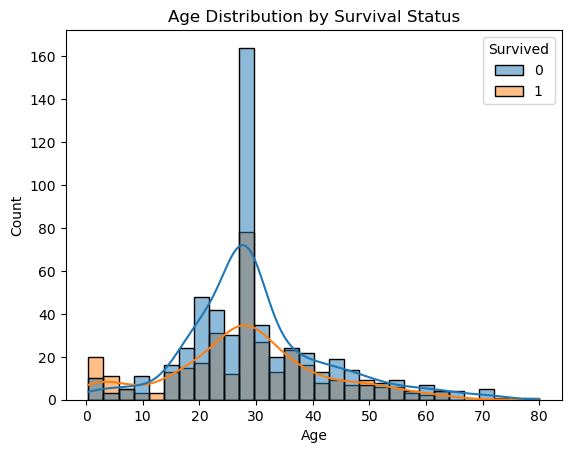

In [85]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival Status')
plt.show()


#### Observations:

* Children (especially <10 years old) had higher survival rates.

* Elderly passengers had a lower survival chance overall.

* Many adult males in the age group 20–40 did not survive.

### Survival vs SibSp (Siblings/Spouses Aboard)

In [87]:
df.groupby(['SibSp', 'Survived']).size().unstack()

Survived,0,1
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,NaN
8,7.0,NaN


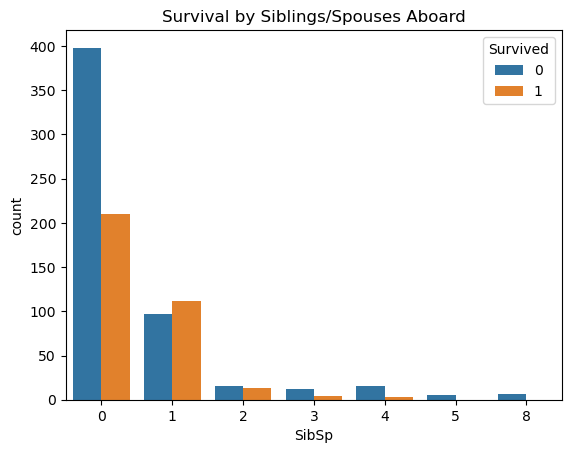

In [86]:
sns.countplot(data=df, x='SibSp', hue='Survived')
plt.title('Survival by Siblings/Spouses Aboard')
plt.show()


#### Observations:

* Passengers with 1–2 family members had better survival chances.

* Those traveling alone or with large families (≥3) had lower survival.

### Survival vs Parch (Parents/Children Aboard)

In [88]:
df.groupby(['Parch', 'Survived']).size().unstack()

Survived,0,1
Parch,,
0,445.0,233.0
1,53.0,65.0
2,40.0,40.0
3,2.0,3.0
4,4.0,NaN
5,4.0,1.0
6,1.0,NaN


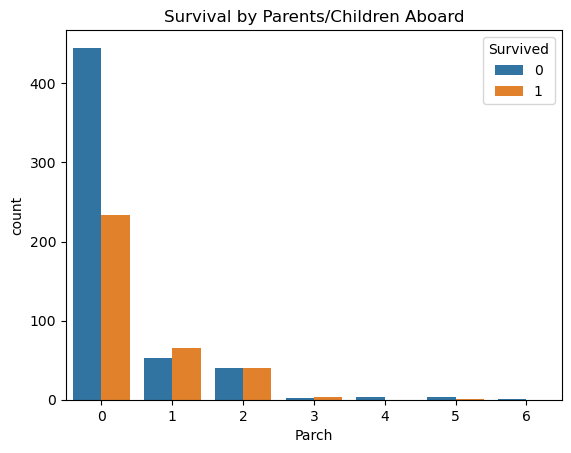

In [89]:
sns.countplot(data=df, x='Parch', hue='Survived')
plt.title('Survival by Parents/Children Aboard')
plt.show()


#### Observations:

* Similar to SibSp: Having 1–2 parents/children with you increased survival odds.

* Very large family groups had poor survival rates.

## Multivariate Analysis 

### Sex + Pclass + Survival

In [90]:
pd.pivot_table(df, values='PassengerId', index=['Sex', 'Pclass'], columns='Survived', aggfunc='count')

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

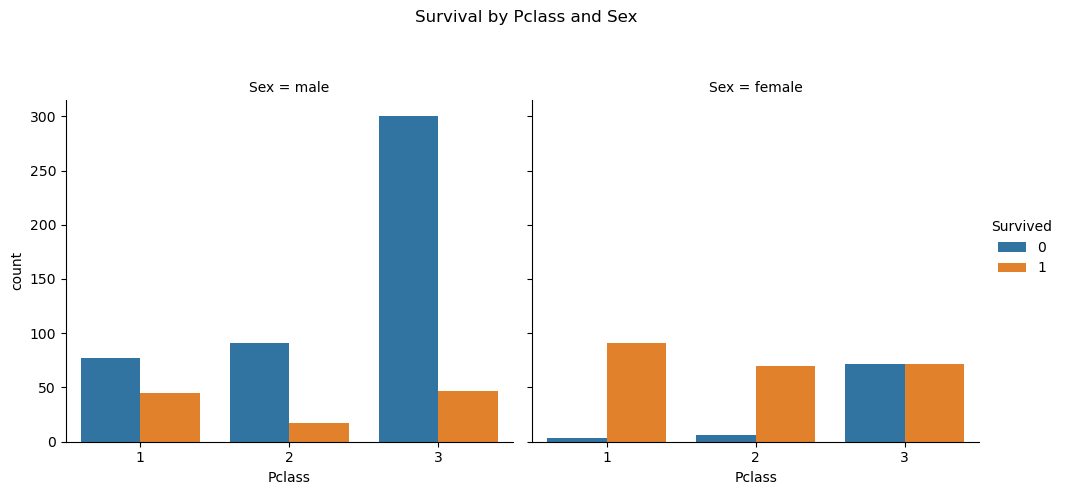

In [91]:
sns.catplot(data=df, x='Pclass', hue='Survived', col='Sex', kind='count')
plt.subplots_adjust(top=0.8)
plt.suptitle('Survival by Pclass and Sex')
plt.show()


#### Observations:

* Females in 1st and 2nd class had very high survival rates (close to 100% in 1st).

* Males in 3rd class had the lowest survival rates — very few survived.

* Survival probability depends heavily on a combination of gender and class.

### Age + Fare + Survival

In [93]:
df.groupby('Survived')[['Age', 'Fare']].mean()

,Age,Fare
Survived,,
0,30.028233,22.117887
1,28.291433,48.395408


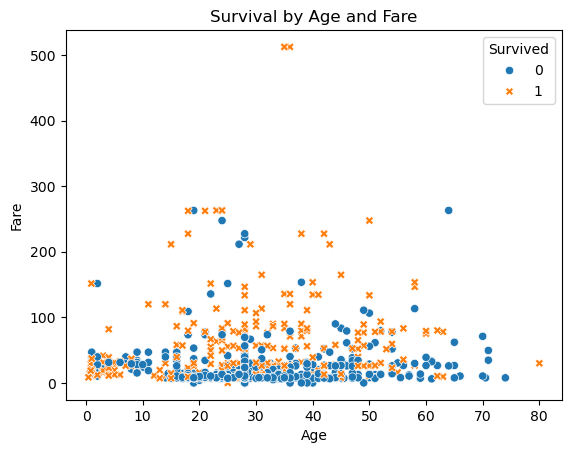

In [92]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', style='Survived')
plt.title('Survival by Age and Fare')
plt.show()


#### Observations:

* Survivors on average were younger and paid more.

* Non-survivors were adults and paid lower fares (more common in 3rd class).

### Correlation Table (for numerical features)

In [94]:
df[['Survived', 'Age', 'Fare', 'Parch', 'SibSp']].corr()

,Survived,Age,Fare,Parch,SibSp
Survived,1.000000,-0.064910,0.257307,0.081629,-0.035322
Age,-0.064910,1.000000,0.096688,-0.172482,-0.233296
Fare,0.257307,0.096688,1.000000,0.216225,0.159651
Parch,0.081629,-0.172482,0.216225,1.000000,0.414838
SibSp,-0.035322,-0.233296,0.159651,0.414838,1.000000


#####  Observations:

* Correlation with Survived:

Fare (0.257): Shows a positive correlation with survival. Passengers who paid higher fares had a better chance of survival — likely indicating that higher-class passengers (who paid more) were prioritized.

Parch (0.0816) and SibSp (-0.0353): These have very weak correlations with survival. Having family members aboard didn’t strongly influence survival in either direction, though Parch is slightly positive.

Age (-0.0649): Shows a very weak negative correlation — younger passengers had a slightly better survival rate, but not significantly.

* Relationships Among Features:

SibSp and Parch (0.4148): Moderate positive correlation — not surprising, as both relate to family aboard.

Fare and Parch (0.216) and Fare and SibSp (0.159): Slight positive correlations — passengers with families may have purchased more expensive group tickets.

Age and SibSp (-0.233) / Age and Parch (-0.172): Negative correlations — younger people tended to travel with more family (siblings/parents), while older ones traveled alone more often.


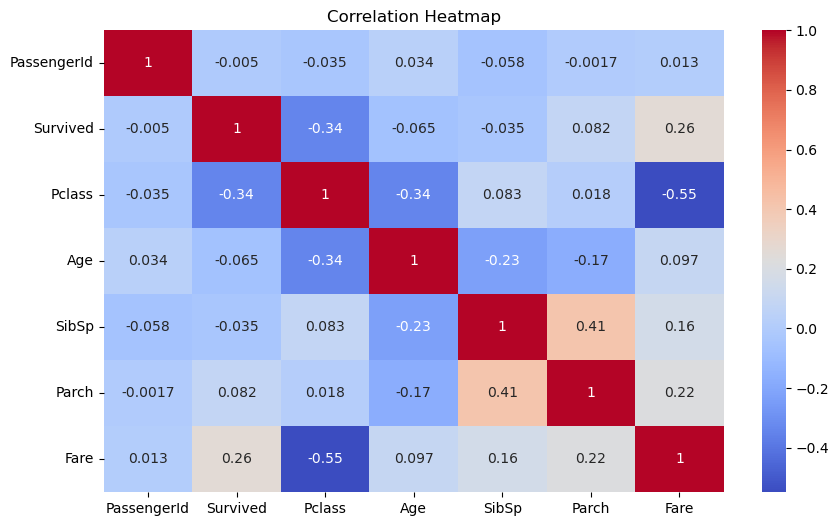

In [95]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#### Observations:

* Fare and Pclass are negatively correlated (higher class = higher fare).

* Survived is moderately correlated with Pclass (higher class = more survival).

* SibSp and Parch are slightly positively correlated, suggesting families traveled together.

### Embarked + Pclass + Survival

In [97]:
df.groupby(['Embarked', 'Pclass', 'Survived']).size().unstack()

Survived           0   1
Embarked Pclass         
C        1        26  59
         2         8   9
         3        41  25
Q        1         1   1
         2         1   2
         3        45  27
S        1        53  76
         2        88  76
         3       286  67

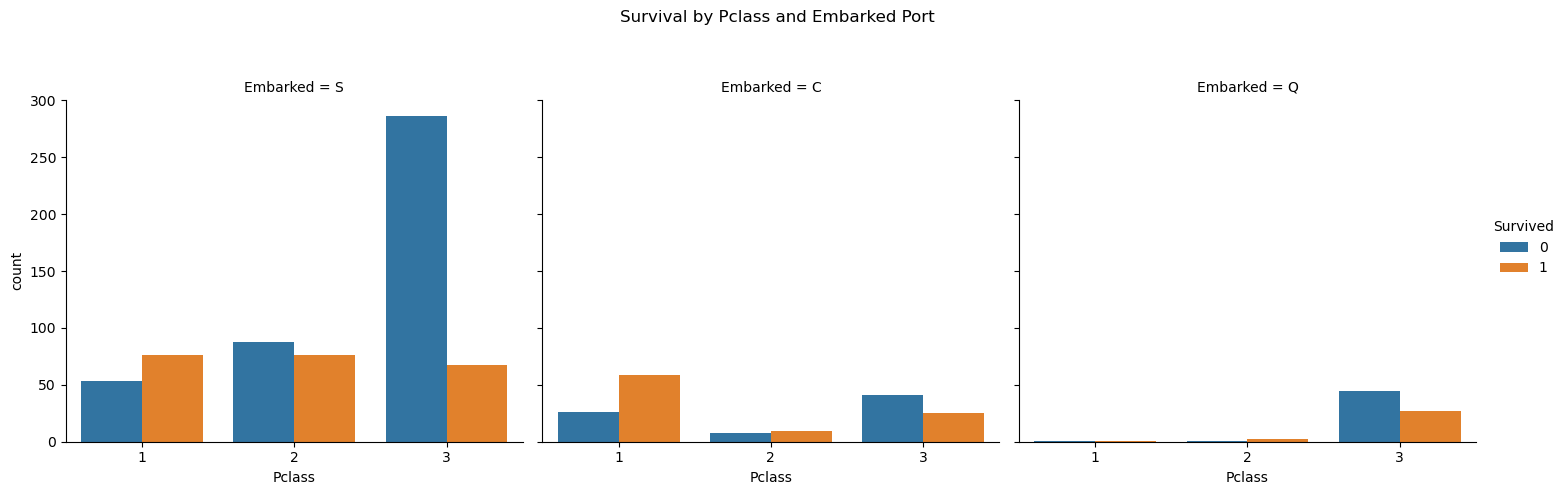

In [96]:
sns.catplot(data=df, x='Pclass', hue='Survived', col='Embarked', kind='count')
plt.subplots_adjust(top=0.8)
plt.suptitle('Survival by Pclass and Embarked Port')
plt.show()


#### Observations:

* 1st class passengers from Cherbourg had the highest survival rate.

* Most 3rd class passengers from Southampton did not survive.

## Summary of Insights

- Being female, younger, and in a higher class greatly increased survival chances.

- Family presence (1–2 members) improved outcomes, but large families fared worse.

- Port of embarkation had an influence, likely due to class distribution across ports.

- Strong interplay between socioeconomic status, age, and gender in survival outcomes.

## Pairplot()

In [9]:
df[con_cols[1:]].groupby('Survived').agg(['mean', 'std', 'min', 'max', 'count'])

Pclass                                Age                         \
              mean       std min max count       mean        std   min   max   
Survived                                                                       
0         2.531876  0.735805   1   3   549  30.028233  12.499986  1.00  74.0   
1         1.950292  0.863321   1   3   342  28.291433  13.764425  0.42  80.0   

                ...     Parch                               Fare             \
         count  ...      mean       std min max count       mean        std   
Survived        ...                                                           
0          549  ...  0.329690  0.823166   0   6   549  22.117887  31.388207   
1          342  ...  0.464912  0.771712   0   5   342  48.395408  66.596998   

                               
          min       max count  
Survived                       
0         0.0  263.0000   549  
1         0.0  512.3292   342  

[2 rows x 25 columns]

In [10]:
df[con_cols[1:]].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


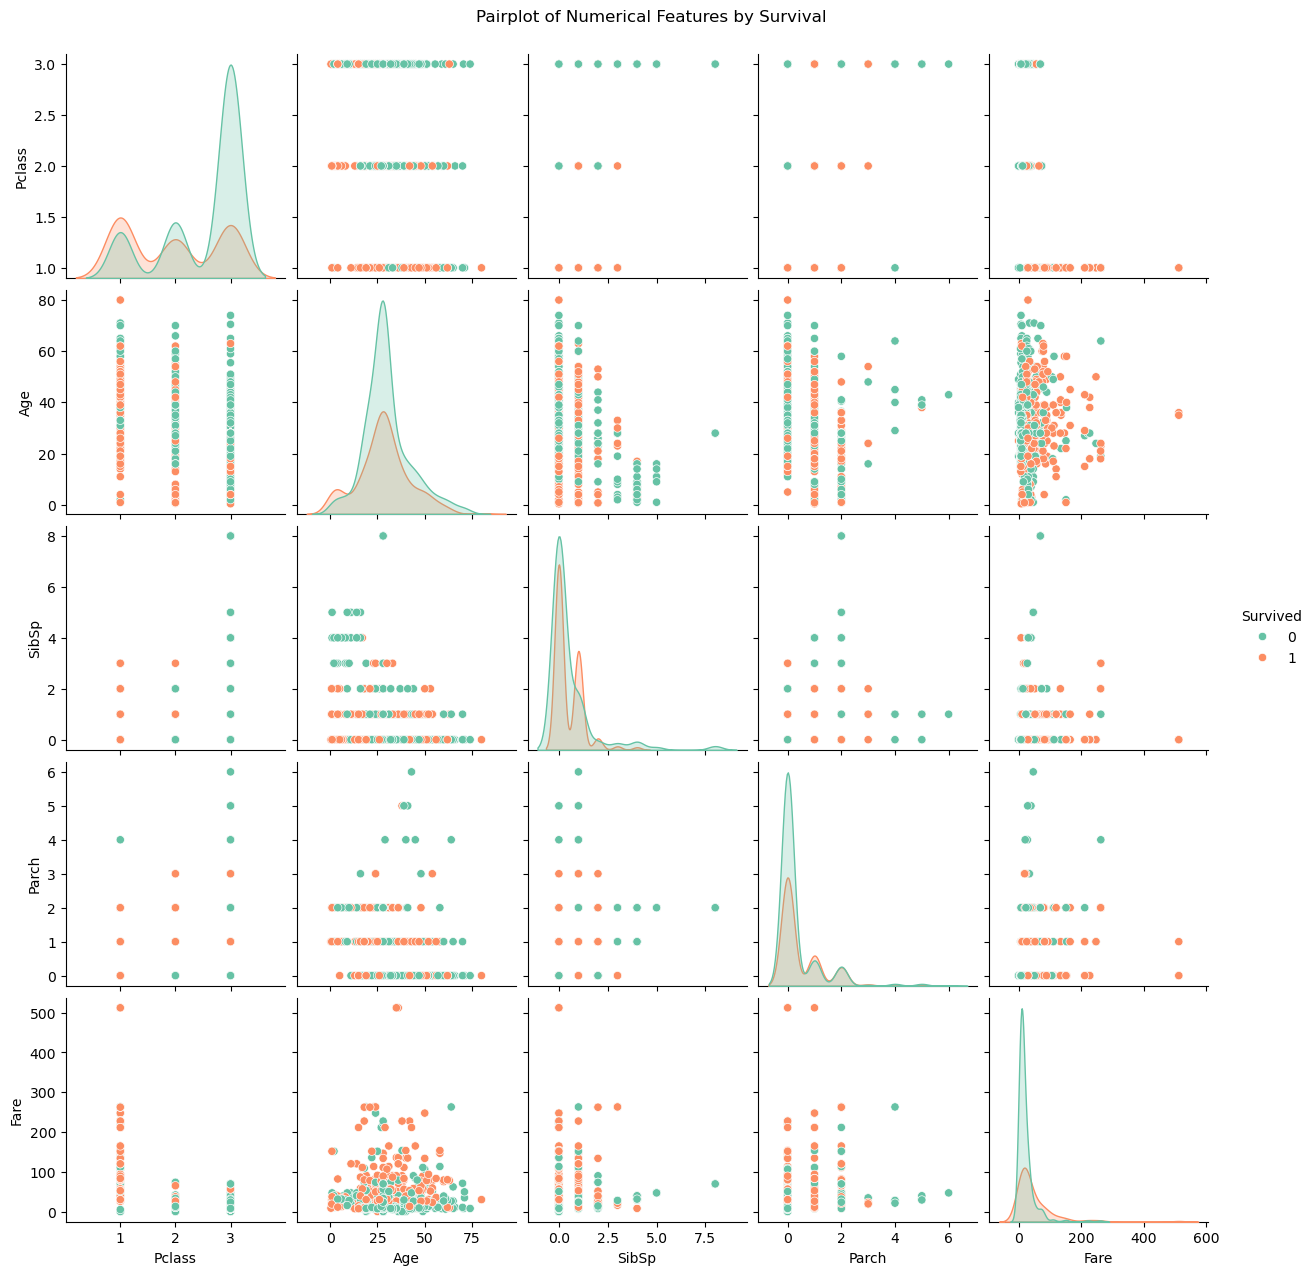

In [7]:
sns.pairplot(df[con_cols[1:]], hue='Survived', palette='Set2')
plt.suptitle('Pairplot of Numerical Features by Survival', y=1.02)
plt.show()

### Summary

 - Survival was most strongly influenced by ticket class (Pclass) and fare paid.

 - Age and family size had smaller effects.

 - Pclass and Fare are key indicators of socioeconomic status, which had a real impact on survival likelihood.

 - There’s minimal correlation between survival and number of siblings or parents/children, but a slight increase in survival when accompanied by family.

### Observations from Grouped Summary by Survived

| Feature      | Not Survived (0) | Survived (1) | Insights                                                                                       |
| ------------ | ---------------- | ------------ | ---------------------------------------------------------------------------------------------- |
| **Pclass**   | Mean ≈ 2.53      | Mean ≈ 1.95  | Survivors were generally in higher classes (1st/2nd). Lower Pclass = higher status.            |
| **Age**      | Mean ≈ 30.03     | Mean ≈ 28.29 | Slightly younger passengers had better survival, but not a strong difference.                  |
| **SibSp**    | Mean ≈ 0.52      | Mean ≈ 0.47  | No significant difference in number of siblings/spouses.                                       |
| **Parch**    | Mean ≈ 0.33      | Mean ≈ 0.46  | Survivors had slightly more parents/children aboard, suggesting family travel may have helped. |
| **Fare**     | Mean ≈ 22.12     | Mean ≈ 48.40 | Survivors paid higher fares on average → indicates link to class and cabin location.           |
| **Max Fare** | ≈ 263            | ≈ 512        | Highest-paying passengers mostly survived, reinforcing above.                                  |
| **Count**    | 549              | 342          | Overall more passengers perished than survived.                                                |


### Observations from Correlation Matrix

| Variable Pair         | Correlation | Interpretation                                                                                            |
| --------------------- | ----------- | --------------------------------------------------------------------------------------------------------- |
| **Survived ↔ Pclass** | **-0.34**   | Strong inverse correlation → lower class (3) passengers had lower survival rates.                         |
| **Survived ↔ Fare**   | **+0.26**   | Passengers who paid more had higher survival → possibly linked to class and cabin proximity to lifeboats. |
| **Survived ↔ Age**    | -0.06       | Very weak negative relationship → age didn't strongly affect survival.                                    |
| **Survived ↔ SibSp**  | -0.035      | Minimal impact → having siblings/spouse aboard didn’t help much.                                          |
| **Survived ↔ Parch**  | +0.08       | Weak positive → being with parents/children may have slightly improved chances.                           |
| **Fare ↔ Pclass**     | **-0.55**   | Strong negative correlation → lower class passengers paid significantly less.                             |
| **SibSp ↔ Parch**     | **+0.41**   | Logical: Families with multiple members often had both siblings and parents/children aboard.              |
